In [1]:
#!pip install ncmcm

In [2]:
import ncmcm as nc
from sklearn.linear_model import LogisticRegression
from IPython.display import display
import os
import pickle
os.chdir('demos')

## Defining Variables
Here neurons used to classify the behaviors are defined. They are later removed from the data. 

In [3]:
b_neurons = [
		'AVAR',
		'AVAL',
		'SMDVR',
		'SMDVL',
		'SMDDR',
		'SMDDL',
		'RIBR',
		'RIBL'
	]

## First Plots
Right after loading the MATLAB file using the Loader class we create the Database instance and can already create some nice plots. 
1. We simply plot the time series of neurons and behavior.
2. We try to visualize the process of the NC-MCM framework in a step by step manner.

6 neurons have been removed.


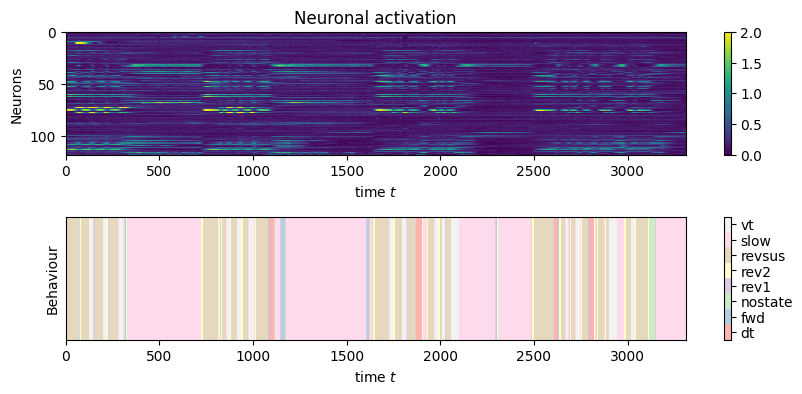

There were no BPT-clusterings computed. It will be done now...
Accuracy for full training data: 0.9347629115070976
Creating new
Testing markovianity for 5 clusters - repetition 1


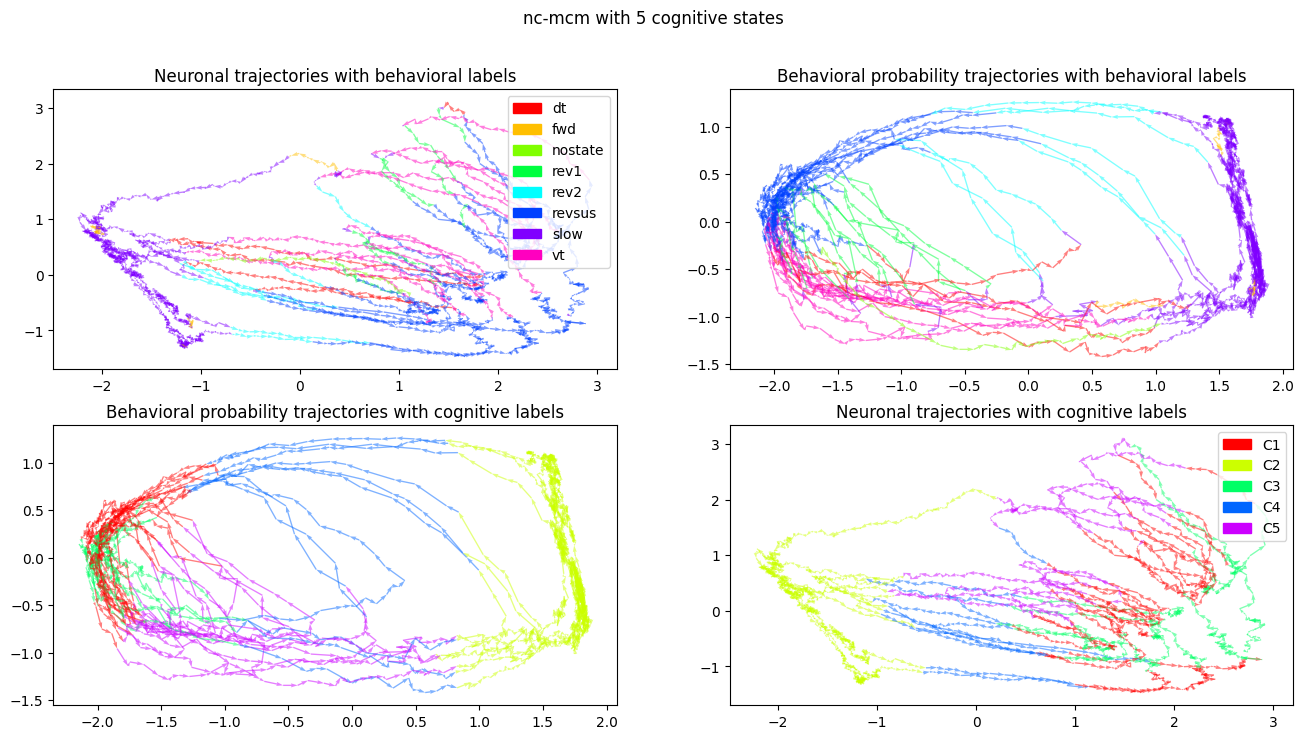

True

In [4]:
matlab = nc.Loader(data_set_no=3, path='../ncmcm/data/datasets/NoStim_Data.mat')
worm = nc.Database(*matlab.data)
worm.exclude_neurons(b_neurons)
%matplotlib inline
worm.plotting_neuronal_behavioral() 
worm.step_plot(nrep=1) # Fast access to concept of NCMCM

## Cognitive Graphs
After attaching our prediction model of choice for mapping into probability space and clustering into cognitive states, we can start to create cognitive graphs (or behavioral state diagrams).
### Matplotlib Graphs
The method `behavioral_state_diagram` will create a matplotlib graph if executed with the parameter `interactive` set on `False`.

Accuracy for full training data: 0.9347629115070976
Testing markovianity - repetition  1
Testing markovianity - repetition  2
Testing markovianity - repetition  3
Testing markovianity - repetition  4
Testing markovianity - repetition  5
Clustering was chosen according to best p-memorylessness.
Calculated threshold is:  0.000513595166163142


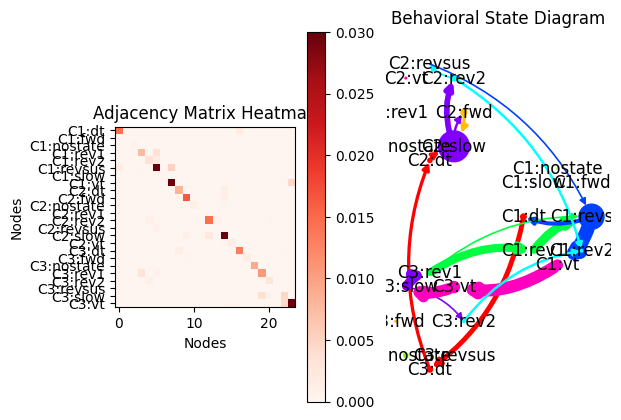

True

In [5]:
lg = LogisticRegression(max_iter=1000)
worm.fit_model(lg, ensemble=True)
worm.cluster_BPT(stationary=False, nrep=5, max_clusters=5, plot_markov=False)
worm.behavioral_state_diagram(interactive=False, adj_matrix=True)


### Interactive Graphs
If we would like to have more control over the node's placement and other settings we can set the parameter `interactive` to `True`. This will generate a HTML-file using the data and a optional physics script as a JSON-file.

In [6]:
worm.behavioral_state_diagram(cog_stat_num=3, interactive=True, show=False, physics="data/physic1.json")

Clustering was chosen according to best p-memorylessness.
Calculated threshold is:  0.000513595166163142
Interactive_C3.html
Plot has been saved under: Interactive_C3.html


True

By opening the generated HTML-file in a browser, one can interact with the graph and position the nodes in a good way for demonstration. The graph feature also allows the user to grey out some points, based on connections or filter visible nodes.

## BunDLe-Net
Using the `create_visualizer` function with only a `Database` object will create a BunDLe-Net by default. After creation of the `Visualizer` instance we can take a look at the loss over time (this only works if the `Visualizer` is a `BunDLe-Net` of course). Then we plot the so created mapping.

Losses 0.004062 0.000037 0.004099: 100%|██████████| 2000/2000 [01:43<00:00, 19.36it/s]


Points have coordinate shape:  (3296, 3)
Accuracy of BundDLeNet: 0.961


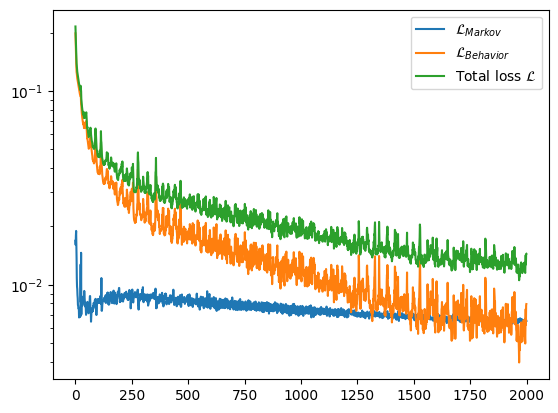

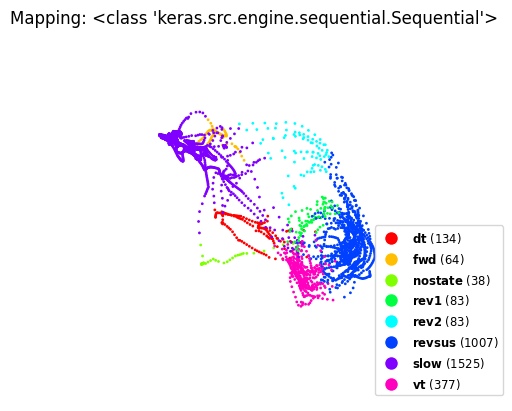

True

In [7]:
Bundle_Net = nc.create_visualizer(worm)
Bundle_Net.plot_loss()
Bundle_Net.plot_mapping(show_legend=True)

## Comparison
We can also create a comparison plot the shows differences between BunDLe-Net prediction and true labels.

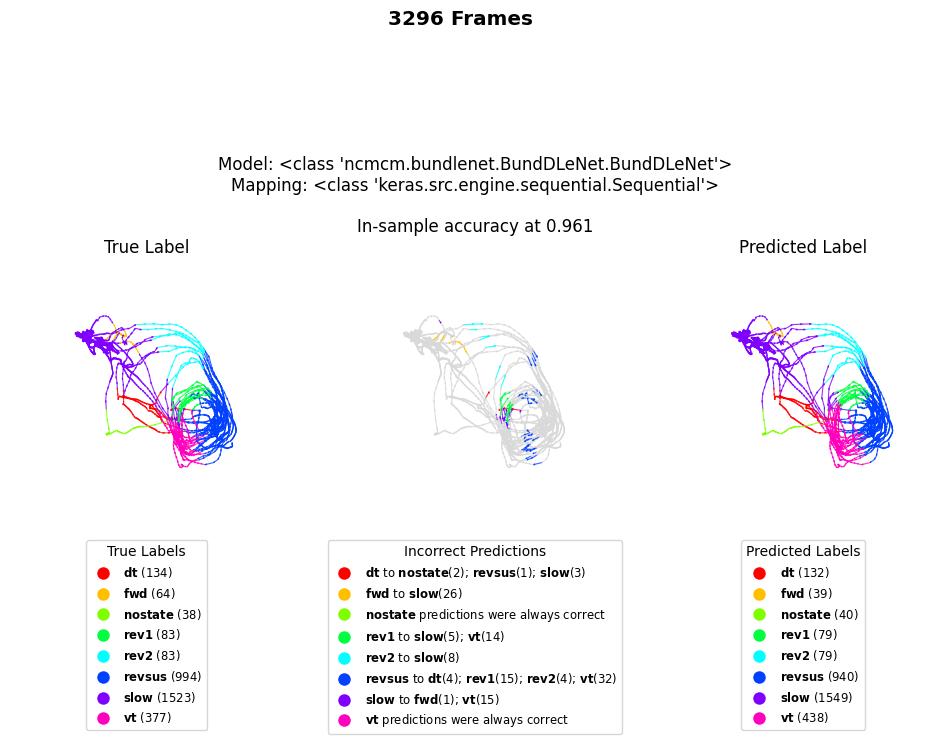

True

In [8]:
Bundle_Net.make_comparison(show_legend=True, quivers=True)

## Movie
Using the `make_movie` method from the Visualizer instance one can generate GIF's from the mapping that is currently attached. The GIF will be saved under 'Example_movie.gif'. The resulting file will be fairly big.

In [7]:
%matplotlib notebook
Bundle_Net.make_movie(draw=False, quivers=True, show_legend=True, interval=10, save=False)
Bundle_Net.save_gif('data/Example_movie')

<IPython.core.display.Javascript object>

This may take a while...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


## Change Mapping
We can also change the mapping used for visualizations, by applying the change_mapping() method with a dimensionality reduction technique projecting into 3 dimensions. We also, did not set the parameter `quivers` to `True`, so each point is displayed as a point, without a arrow, indicating the direction.

Points have coordinate shape:  (3311, 3)


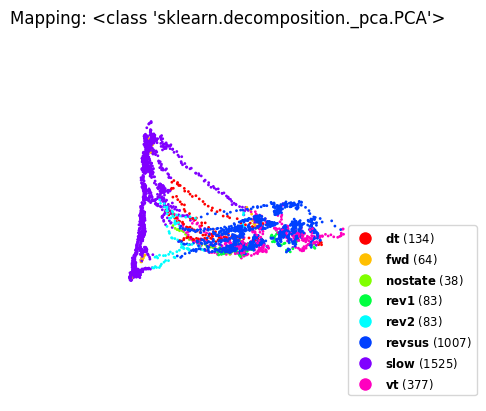

True

In [10]:
from sklearn.decomposition import PCA
%matplotlib inline
Bundle_Net.change_mapping(PCA(n_components=3))
Bundle_Net.plot_mapping(show_legend=True)

## Statistical Testing
Here we will go over all the worms from the dataset and cluster their behavior probabilities into cognitive clusters of up to 25 clusters in 10 iterations. The results are saved in pickle files for later access. Using the plots created from the cluster_BPT() method one can see which amounts of cognitive clusters seem to be compatible with Markovianity.

In [11]:
reps = 7
clusters = 25

data_average_memory = []
data_average_stationary = []
WORMS = []
for i in range(5):
	print(f'Worm no#{i+1}')
	matlab = nc.Loader(i, path='../ncmcm/data/datasets/NoStim_Data.mat')
	worm = nc.Database(*matlab.data)
	worm.exclude_neurons(b_neurons)
	lg = LogisticRegression(max_iter=1000)
	worm.fit_model(lg, ensemble=True)
	worm.cluster_BPT(stationary=True, nrep=reps, max_clusters=clusters, plot_markov=True, verbose=0)
	data_average_memory.append(np.mean(worm.p_memoryless, axis=1))
	data_average_stationary.append(np.mean(worm.p_stationary, axis=1))

	with open(f'data/data_worm_{i+1}.pkl', 'wb') as file:
		pickle.dump(worm, file)


Worm no#1
6 neurons have been removed.
Accuracy for full training data: 0.8833280204016576


KeyboardInterrupt: 

## Average Plot
From all 5 worms we can look at the average results of the Markov property test. This will allow us to argue across worms.

In [ ]:
nc.average_markov_plot(np.asarray(data_average_memory))
nc.average_markov_plot(np.asarray(data_average_stationary))

## Loading Pickles
Here we just show quickly how the pickles can be loaded back into memory.

In [2]:
# For loading the data
num = 2
with open(f'data/data_worm_{num}.pkl', 'rb') as file:
	data = pickle.load(file)

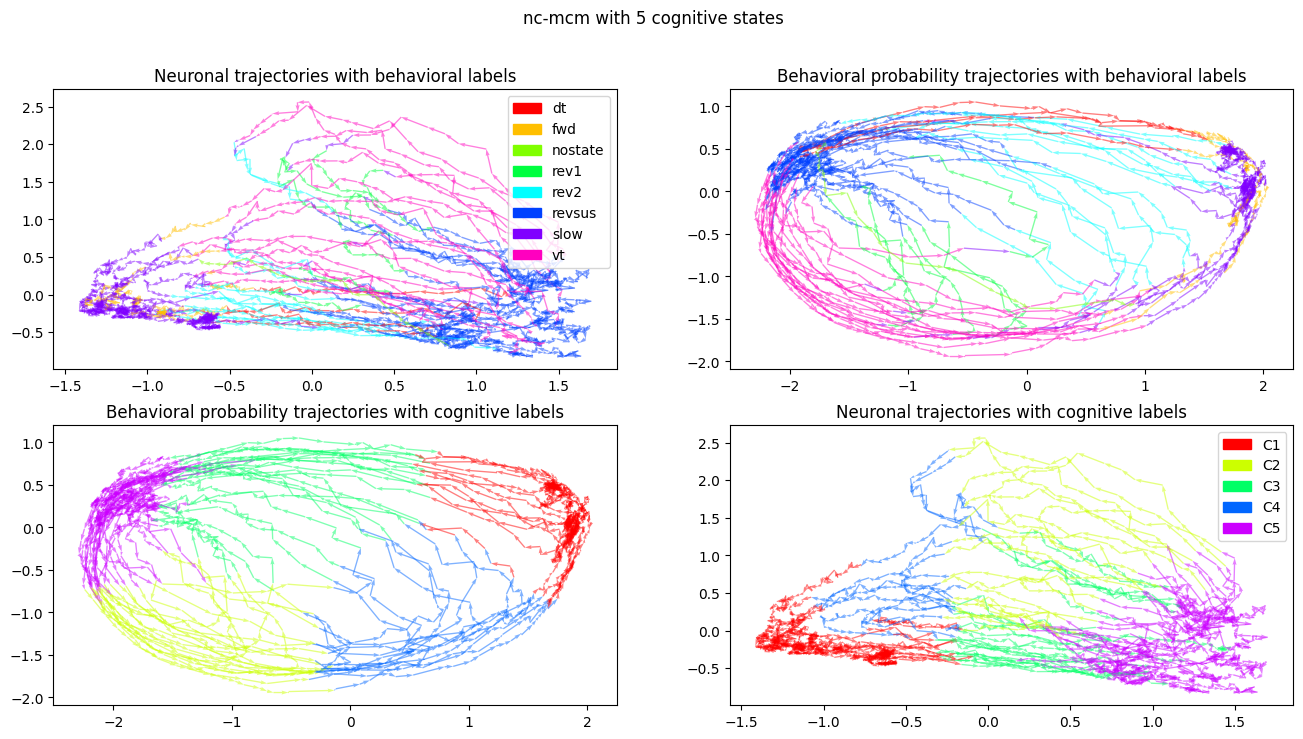

Calcualted threshold is:  0.0006666666666666666
Clustering was chosen according to best p-memorylessness.
Test.html
Plot has been saved under: Test.html


True

In [3]:
%matplotlib inline
data.step_plot()
data.behavioral_state_diagram(interactive=True, show=False)